**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Moneyball NBA](static/05-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique est consacrée à la mise en oeuvre de l'ensemble des connaissances acquises jusqu'alors sur un nouveau jeu de données, *NBA*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Lecture du jeu de données *NBA*

**Lire le fichier `NBA_train.csv`**

In [4]:
# Compléter le code ci-dessous ~ 1 lign

**Afficher les dix premières lignes de la trame de données**

In [5]:
# Compléter le code ci-dessous ~ 1 ligne
NBA.head(10)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533
5,1980,Detroit Pistons,0,16,8933,9609,3643,7596,3586,7377,57,219,1590,2149,1226,2415,1950,783,562,1742
6,1980,Golden State Warriors,0,24,8493,8853,3527,7318,3500,7197,27,121,1412,1914,1155,2437,2028,779,339,1492
7,1980,Houston Rockets,1,41,9084,9070,3599,7496,3495,7117,104,379,1782,2326,1394,2217,2149,782,373,1565
8,1980,Indiana Pacers,0,37,9119,9176,3639,7689,3551,7375,88,314,1753,2333,1398,2326,2148,900,530,1517
9,1980,Kansas City Kings,1,47,8860,8603,3582,7489,3557,7375,25,114,1671,2250,1187,2429,2123,863,356,1439


Ci-dessous, la description des différentes variables explicatives du jeu de données
</br>

| Variable      | Description                                                   |
| ------------- |:-------------------------------------------------------------:|
| SeasonEnd     | Année de fin de la saison                                     |
| Team          | Nom de l'équipe                                               |
| Playoffs      | Indique si l'équipe est allée en playoffs                     |
| W             | Nombre de victoires au cours de la saison régulière           |
| PTS           | Nombre de points obtenus (saison régulière)                   |
| oppPTS        | Nombre de points obtenus pas les opposants (saison régulière) |
| FG            | Nombre de Field Goals réussis                                 |
| FGA           | Nombre de tentatives de Field Goals                           |
| 2P            | Nombre de 2-pointers réussis                                  |
| 2PA           | Nombre de tentatives de 2-pointers                            |
| 3P            | Nombre de 3-pointers réussis                                  |
| 3PA           | Nombre de tentatives de 3-pointers                            |
| FT            | Nombre de Free throws réussis                                 |
| FTA           | Nombre de tentatives de Free throws                           |
| ORB           | Nombre de rebonds offensifs                                   |
| DRB           | Nombre de rebonds défensifs                                   |
| AST           | Nombre de passes décisives (assists)                          |
| STL           | Nombre d'interceptions (steals)                               |
| BLK           | Nombre de contres (blocks)                                    |
| TOV           | Nombre de turnovers                                           |


### 1 - Régression linéaire simple

Nous allons dans un premier temps effectuer la prédiction du nombre de victoires au cours de la saison régulière en fonction de la différence de points obtenus pas l'équipe et par ses opposants
<br/><br/>
Nous commencons donc par un peu d'**ingénierie de données**. Une nouvelle variable explicative correspondant à la différence de points obtenus pas l'équipe et par ses opposants est crée

**Créer un nouvelle variable PTSdiff, représentant la différence entre PTS et oppPTS**

In [6]:
# Compléter le code ci-dessous ~ 1 ligne
NBA['PTSdiff'] = NBA['PTS'] - NBA['oppPTS']

**Stocker le nombre de lignes du jeu de donnée (nombre d'exemples d'entraînement) dans la variable `m`**

In [7]:
# Compléter le code ci-dessous ~ 1 ligne
m = len(NBA)

**Stocker le nombre de victoires au cours de la saison dans la variable `y`. Il s'agira de la variable que l'on cherche à prédire**

In [8]:
# Compléter le code ci-dessous ~ 1 ligne
y  = NBA['W']

**Créer la matrice des prédicteurs `X`.** Indice: `X` doit avoir 2 colonnes...

In [9]:
# Compléter le code ci-dessous ~ 3 lignes
x0 = np.ones((m))
x1 = NBA['PTSdiff']
X = np.array((x0,x1))

**Vérifier la dimension de la matrice des prédicteurs `X`. Quelle est la dimension de `X` ?**

In [10]:
# Compléter le code ci-dessous ~ 1 ligne
X.shape

(2, 835)

**Créer le modèle de référence (baseline)**

In [11]:
# Compléter le code ci-dessous ~ 1 ligne
y_baseline = y.mean()
y_baseline

41.0

**À l'aide de l'équation normale, trouver les paramètres optimaux du modèle de régression linéaire simple**

In [12]:
# Compléter le code ci-dessous ~ 1 ligne
theta = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y)
theta

array([4.10000000e+01, 3.25863328e-02])

**Calculer la somme des carrées des erreurs (SSE)**

In [13]:
# Compléter le code ci-dessous ~ 1 ligne
SSE = np.dot((np.dot(theta.T, X) - y).T,(np.dot(theta.T, X) - y))
SSE

7805.790105942693

**Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)**

In [14]:
# Compléter le code ci-dessous ~ 1 ligne
RMSE = np.sqrt(SSE/m)
RMSE

3.0574910668526023

**Calculer le coefficient de détermination $R^2$**

In [15]:
# Compléter le code ci-dessous ~ 1-2 lignes
R2 = 1 - (SSE/np.sum((y_baseline-y)**2))
R2

0.9423424819699613

**Affichage des résultats**

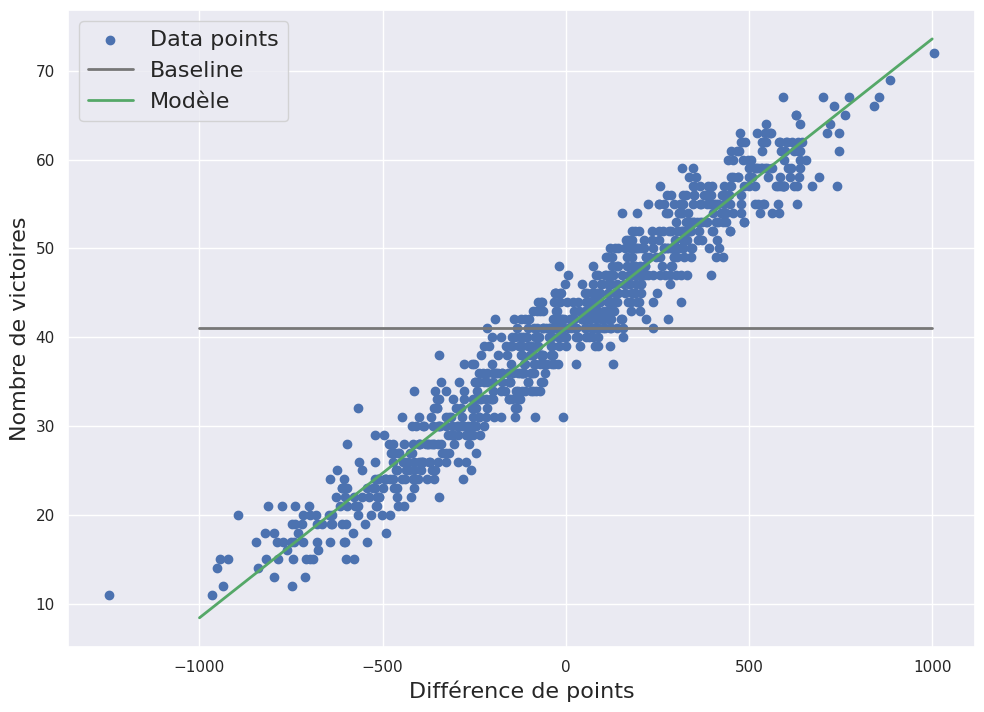

In [16]:
fig, ax = plt.subplots()
ax.scatter(x1, y,label="Data points")
reg_x = np.linspace(-1000,1000,50)
reg_y = theta[0] + np.linspace(-1000,1000,50)* theta[1]
ax.plot(reg_x, np.repeat(y_baseline,50), color='#777777', label="Baseline", lw=2)
ax.plot(reg_x, reg_y, color="g", lw=2, label="Modèle")
ax.set_xlabel("Différence de points", fontsize=16)
ax.set_ylabel("Nombre de victoires", fontsize=16)
ax.legend(loc='upper left', fontsize=16)

### 3 - Régression linéaire multiple

Nous allons maintenant tenter de prédire le nombre de points obtenus par une équipe donnée au cours de la saison régulière en fonction des autres variables explicatives disponibles. Nous allons mettre en oeuvre plusieurs modèles de régression linéaire multiple

**Stocker le nombre de points marqués au cours de la saison dans la variable `y`. Il s'agira de la varible que l'on cherche à prédire**

In [17]:
# Compléter le code ci-dessous ~ 1 ligne
y  = NBA['PTS']

**Créer la matrice des prédicteurs `X` à partir des variables `2PA` et `3PA`**

In [18]:
# Compléter le code ci-dessous ~ 3 lignes
x0 = np.ones((m))
x1 = NBA['2PA']
x2 = NBA['3PA']
X = np.array((x0,x1,x2))

**Vérifier la dimension de la matrice des prédicteurs `X`. Quelle est la dimension de `X` ?**

In [19]:
# Compléter le code ci-dessous ~ 1 ligne
X.shape

(3, 835)

**Créer le modèle de référence (baseline)**

In [20]:
# Compléter le code ci-dessous ~ 1 ligne
y_baseline = y.mean()
y_baseline

8370.239520958085

**À l'aide de l'équation normale, trouver les paramètres optimaux du modèle de régression linéaire**

In [21]:
# Compléter le code ci-dessous ~ 1 ligne
theta = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y)
theta

array([845.79026343,   1.10276102,   1.04257987])

**Calculer la somme des carrées des erreurs (SSE)**

In [22]:
# Compléter le code ci-dessous ~ 1 ligne
SSE = np.dot((np.dot(theta.T, X) - y).T,(np.dot(theta.T, X) - y))
SSE

103540207.23869774

**Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)**

In [23]:
# Compléter le code ci-dessous ~ 1 ligne
RMSE = np.sqrt(SSE/m)
RMSE

352.1366896392041

**Calculer le coefficient de détermination $R^2$**

In [24]:
# Compléter le code ci-dessous ~ 1-2 lignes
R2 = 1 - (SSE/np.sum((y_baseline-y)**2))
R2

0.6322685733797786

### 3 - Ajouter les variables explicatives FTA et AST

**Recommencer les étapes ci-dessus en incluant les variables FTA et AST**

<strong style="color: red">Attention nous obtenons ici une matrice singulière, certainement à cause d'une colinéarité entre les colonnes</strong>

In [30]:
x3 = NBA['FTA']
x4 = NBA['AST']
X = np.concatenate((X, np.array((x3,x4))))
X.shape

(7, 835)

In [31]:
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X,X.T)),X),y)
theta

array([-1.64640056e+03,  8.01335733e-01,  1.11785944e+00,  5.06979894e-01,
        5.22477909e-01,  5.06977222e-01,  5.22477903e-01])

In [32]:
SSE = np.dot((np.dot(theta.T, X) - y).T,(np.dot(theta.T, X) - y))
SSE

35362518.170297176

In [33]:
RMSE = np.sqrt(SSE/m)
RMSE

205.79193658166625

In [34]:
R2 = 1 - (SSE/np.sum((y_baseline-y)**2))
R2

0.8744071544528769

### 4 - Ajouter les variables explicatives ORB et STL

**Recommencer les étapes ci-dessus en incluant les variables ORB et STL**

In [35]:
x5 = NBA['ORB']
x6 = NBA['STL']
X = np.concatenate((X, np.array((x5,x6))))
X.shape

(9, 835)

In [42]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y)
theta

LinAlgError: Singular matrix

In [43]:
SSE = np.dot((np.dot(theta.T, X) - y).T,(np.dot(theta.T, X) - y))
SSE

28421464.86262351

In [44]:
RMSE = np.sqrt(SSE/m)
RMSE

184.49304179347197

In [45]:
R2 = 1 - (SSE/np.sum((y_baseline-y)**2))
R2

0.8990588670884672

### 5 - Ajouter les variables explicatives DRB et BLK

**Recommencer les étapes ci-dessus en incluant les variables DRB et BLK**

In [46]:
x7 = NBA['DRB']
x8 = NBA['BLK']
X = np.concatenate((X, np.array((x8,x8))))
X.shape

(11, 835)

In [47]:
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X,X.T)),X),y)
theta

array([-2.01546303e+03,  1.04828380e+00,  1.27079486e+00,  5.64226903e-01,
        4.45465550e-01,  5.64232157e-01,  4.45461732e-01, -9.70177698e-01,
       -2.27577422e-01, -1.94094482e-02, -1.94094482e-02])

In [48]:
SSE = np.dot((np.dot(theta.T, X) - y).T,(np.dot(theta.T, X) - y))
SSE

28413699.449087918

In [49]:
RMSE = np.sqrt(SSE/m)
RMSE

184.46783614971469

In [50]:
R2 = 1 - (SSE/np.sum((y_baseline-y)**2))
R2

0.8990864465831765

### 6 - Optionnel - Regression polynomiale

Ajouter des variables explicatives de type polynomiales

### Fin du TP